#**Машинное обучение ИБ-2024**

#**Домашнее задание 3.**
#Классификация текстов, методы обучения без учителя.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Все выводы ячеек вашей сданной работы должны оставаться в сданном ноутбуке, результаты должны быть видны. В противном случае 0 за задание!**

## Классификация текстов.

В этой части домашней работы Вам требуется реализовать полный пайплайн работы с текстами и моделями машинного обучения. От предобработки до запуска обучения моделей для задачи классификации.

**Задачи**:
1. Предобработка - Вам необходимо в представленных текстах избавиться от пунктуации, чисел и стоп-слов (nltk stopwords), привести тексты к нижнему регистру.
2. Сделать на Вашем корпусе очищенных текстов Лемматизацию или Стемминг. При этом словестно пояснить, что делает метод.
3. Разбить полученный датасет на train и test выборки в отношении 4:1
4. Привести ваши тексты из датасета к векторному формату. Тут необходимо попробовать два метода, разобранных на семинаре: Bag of words и TF-IDF. При этом словестно пояснить, что делает метод.
5. Провести кросс-валидация на подбор гиперпараметров моделей (GridSearchCV) и обучить модели: Логистическая регрессия, Random Forest, Gradient Boosting из CatBoost или XGBoost или LightGBM. (В данном задании не стоит "упарываться" в подбор гиперпараметров и считать каждую модель по 10 часов, покажите в коде, что Вы перебирали по сетке 2-3 гиперпараметра в разумном по времени интервале).
6. Замерьте метрики accuracy, precision, recall, F1-Score, ROC-AUC. Постройте ConfusionMatrix, сделайте анализ решения.

Все пункты задания весят по 1 Баллу. То есть за данный раздел можно получить максимум 6 Баллов.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import nltk
import matplotlib as plt

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')
print(df.head())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [ ]:
print(len(df))

83448


## Предобработка:

In [ ]:
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = "".join([char for char in text if char.isalpha() or char.isspace()])
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if not word in stop_words]
    text = ' '.join(tokens)
    return text

df = df[:25000]
df['text'] = df['text'].apply(preprocess_text)

# Лемматизация
Лемматизация - это процесс приведения слова к его нормальной форме (лемме) с помощью морфологических словарей. Например, лемма для слов "бежал", "бегу", "бегать" будет "бежать".

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(lemmas)
    return text

df['text'] = df['text'].apply(lemmatize_text)

In [ ]:
print(df.head())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0  computer connection from cnn com wednesday esc...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answer guy i know i should...


# Разделение выборки на train и test

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация
Bag of words - метод представления текста в виде вектора, где каждый элемент вектора соответствует слову из словаря, а значение элемента - количеству раз, которое это слово встречается в тексте.

TF-IFD - метод, который учитывает не только частоту слова в тексте, но и его важность в корпусе документов. Слова, которые встречаются во многих документах, имеют меньший вес.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


In [ ]:
print(X_train_bow[0][0:10])
print()
print(X_train_tfidf[0][0:10])

  (0, 118616)	1
  (0, 19837)	1
  (0, 122974)	1
  (0, 58212)	1
  (0, 117967)	1
  (0, 117927)	1
  (0, 4604)	2
  (0, 102292)	1
  (0, 72658)	1
  (0, 71951)	1
  (0, 97315)	1
  (0, 124579)	1
  (0, 71684)	1
  (0, 42133)	2
  (0, 10962)	1
  (0, 110081)	1
  (0, 80103)	1
  (0, 86969)	1
  (0, 6230)	1
  (0, 48464)	1
  (0, 77936)	1
  (0, 109640)	4
  (0, 20711)	1
  (0, 40927)	1
  (0, 80150)	1
  :	:
  (0, 42555)	1
  (0, 46050)	1
  (0, 55662)	1
  (0, 14263)	3
  (0, 52520)	2
  (0, 3527)	1
  (0, 26958)	1
  (0, 13820)	1
  (0, 38778)	3
  (0, 99312)	1
  (0, 112403)	2
  (0, 121000)	2
  (0, 49868)	1
  (0, 88464)	1
  (0, 86371)	2
  (0, 72984)	2
  (0, 81529)	1
  (0, 42304)	1
  (0, 2807)	1
  (0, 77983)	1
  (0, 90622)	2
  (0, 104703)	1
  (0, 114148)	2
  (0, 47204)	1
  (0, 16445)	1

  (0, 118616)	0.0852945108687677
  (0, 19837)	0.0852945108687677
  (0, 122974)	0.07105356126719048
  (0, 58212)	0.08190737807415956
  (0, 117967)	0.035359289763777974
  (0, 117927)	0.0852945108687677
  (0, 4604)	0.02274988626202526
  (

# Обучение моделей

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
!pip install catboost
from catboost import CatBoostClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga']
}
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200]})

In [ ]:
model_cb = CatBoostClassifier(random_state=42, verbose=0)
# param_grid_cb = {
#     'iterations': [100, 200],
#     'learning_rate': [0.01, 0.1],  # считал с этой строкой (2х2х3 сетка была), после 6 часов счёта лёг спать, утром увидел, что дисконнектнулось :)
#     'depth': [4, 6, 8]
# }
param_grid_cb = {
    'iterations': [100, 200],
    'depth': [6, 8]
}
grid_search_cb = GridSearchCV(model_cb, param_grid_cb, cv=5)
grid_search_cb.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7d6bad122830>,
             param_grid={'depth': [6, 8], 'iterations': [100, 200]})

# Метрики

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_lr = grid_search_lr.predict(X_test_tfidf)
y_pred_rf = grid_search_rf.predict(X_test_tfidf)
y_pred_cb = grid_search_cb.predict(X_test_tfidf)

def print_metrics(y_true, y_pred, model_name):
    print(f"Метрики для {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred)}")
    print("-" * 20)

print_metrics(y_test, y_pred_lr, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_cb, "CatBoost")

Метрики для Logistic Regression:
Accuracy: 0.983
Precision: 0.9781859931113662
Recall: 0.9891640866873065
F1-Score: 0.983644410236675
ROC-AUC: 0.9827856857277592
--------------------
Метрики для Random Forest:
Accuracy: 0.9812
Precision: 0.9773773006134969
Recall: 0.9864551083591331
F1-Score: 0.9818952234206472
ROC-AUC: 0.9810172892789043
--------------------
Метрики для CatBoost:
Accuracy: 0.9762
Precision: 0.962129733783277
Recall: 0.9930340557275542
F1-Score: 0.977337649971434
ROC-AUC: 0.9756147099829824
--------------------


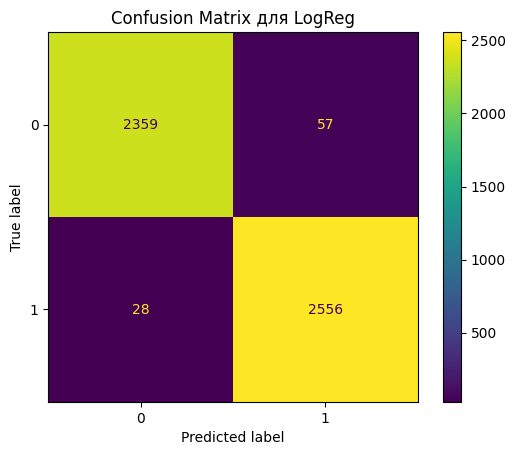

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.title("Confusion Matrix для LogReg")
plt.show()


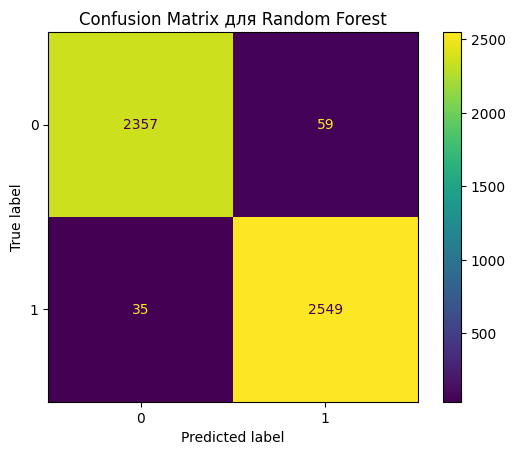

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix для Random Forest")
plt.show()

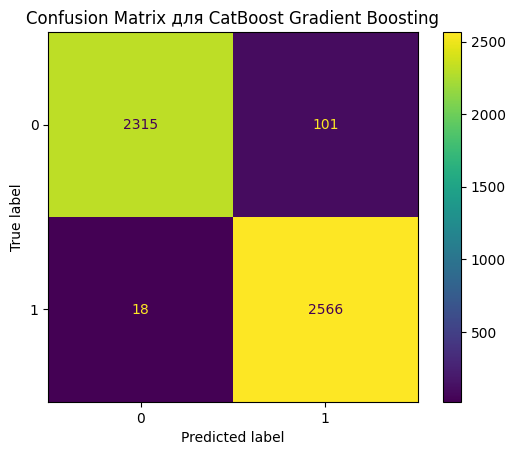

In [ ]:
cm_cb = confusion_matrix(y_test, y_pred_cb)
disp_cb = ConfusionMatrixDisplay(confusion_matrix=cm_cb)
disp_cb.plot()
plt.title("Confusion Matrix для CatBoost Gradient Boosting")
plt.show()

# Анализ
Лучше всех себя показал LogReg, чуть хуже Random Forest, хуже всех CatBoost (по большинству метрик). Однако CatBoost за счёт низкого количества false negative и высокого false positive показывает наибольшее значение метрики Recall.

Делать вывод, что LogReg лучше всех справляется с данной задачей неуместно, так как он имел самую большую сетку параметров (3х3), в то время, как остальные модели имели меньшую сетку (2x3 у Random Forest и 2x2 у CatBoost classifier) из-за более долгого обучения, что не позволило проверить все потенциально лучшие комбинации параметров.
Также следует учесть, что была использована не вся выборка (25к из ~86к)

## Обучение без учителя

Сгенерируем смесь Гауссовских распределений. Эти данные Вам необходимо будет далее кластеризировать с помощью различных алгоритмов  кластеризации. Во всех заданиях Вам необходимо отрисовывать кластеры, которые Вы получили в результате работы моделей (графики, оси должны быть подписаны).

In [1]:
np.random.seed(42)
n_samples = 1000
means = [[0, 0], [3, 3], [-3, 3]]
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.4], [-0.4, 1]], [[0.5, 0], [0, 0.75]]]
weights = [0.4, 0.4, 0.2]

X = np.zeros((n_samples, 2))
labels = np.zeros(n_samples, dtype=int)
current = 0

for i, (mean, cov, weight) in enumerate(zip(means, covariances, weights)):
    n_cluster_samples = int(n_samples * weight)
    X[current : current + n_cluster_samples, :] = np.random.multivariate_normal(mean, cov, n_cluster_samples)
    labels[current : current + n_cluster_samples] = i
    current += n_cluster_samples

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.title("Двумерная смесь Гауссиан")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Кластеры")
plt.show()

NameError: name 'np' is not defined

**Задание 1 [1 Балл].** Заиспользуйте метод K-Means для кластеризации полученной смесси Гауссовских распределений. Подберите гиперпараметр K максимизируя метрику индекс Силуэта (Silhouette Coefficient).

**Задание 2 [1 Балл].** Заиспользуйте метод DBSCAN для кластеризации полученной смесси Гауссовских распределений. Подберите гиперпараметры eps, min_samples максимизируя метрику BCubed (золотой стандарт записан в переменной labels).

**Задание 3 [2 Балл].** Реализуйте EM алгоритм для кластеризации смеси Гауссовских смесей. Попробуйте его применить для кластеризации. Распишите, что делает E и M шаги в коде комментариями. Напишите краткий отчет, какой из алгоритмов кластеризации сработал лучше всего на сгенерированных данных.

EM алгоритм для разделения смеси Гауссовских распределений:

$$
p(X, Z|\pi, \mu, \Sigma) = \prod_{i=1}^\ell \prod_{k=1}^K \Big[\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \Big]^{z_ik}
$$

Соответственно, Е-шаг:

$$
g_{ik} := p\big(z_{ik} = 1\big|x_i, \pi, \mu, \Sigma\big) = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{s=1}^K \pi_s \mathcal{N}(x_i | \mu_s, \Sigma_s)}
$$

И М-шаг:

$$
\pi_k = \frac{1}{\ell} \sum_{i=1}^\ell g_{ik} \quad\quad \mu_k = \frac{1}{\ell \pi_k} \sum_{i=1}^\ell g_{ik} x_i
$$

$$
\Sigma_k = \frac{1}{\ell \pi_k} \sum_{i=1}^\ell g_{ik} (x_i - \mu_k) (x_i - \mu_k)^T
$$

**Бонус [1 Балл].** Заиспользуйте модель GaussianMixture для кластеризации сгенерированной выборки. Мы не проходили GaussianMixture, поэтому для бонусного балла ознакомьтесь с моделью и опишите, как она работает.